In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [15]:
life_expectancy_path = "life_expectancy.csv"

life_expectancy_data = pd.read_csv(life_expectancy_path)

life_expectancy_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [16]:
style_dict = {
    "Mean": "{:.2f}", 
    "Median": "{:.2f}",
    "Variance": "{:.2f}", 
    "Standard Deviation": "{:.2f}",
    "Standard Error": "{:.2f}", 
    "mean": "{:.2f}",
    "median": "{:.2f}",
    "var": "{:.2f}",
    "std": "{:.2f}",
    "sem":"{:.2f}",
    'GDP': "{:.3f}",
    "percentage expenditure": "{:.2f}",
}

In [17]:
life_exp_df = life_expectancy_data.copy()

In [18]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [19]:
len(life_exp_df["Country"].unique())

# 193 Countries

193

In [20]:
reduced_df = life_exp_df[['Country', 'Year', 'Status', 'Life expectancy ',
       'Alcohol', ' BMI ', 'Total expenditure','GDP', 'Population',
       'Income composition of resources', 'Schooling']].copy()

reduced_df.columns = [col.strip() for col in reduced_df.columns]

#reduced_df

In [21]:
drop_countries = ['San Marino', 'Marshall Islands', 'Cook Islands', 'Saint Kitts and Nevis', 'Niue', 'Palau', 'Dominica', 'Monaco', 'Nauru',
                  'Tuvalu']

for country in drop_countries:
    reduced_df.drop(reduced_df[reduced_df['Country'] == country].index, inplace=True)
    
#reduced_df['Country'].value_counts() #all 16
#183 countries

In [22]:
## Dropped 10 Countries - missing life expectancy data
#### San Marino, Marshall Islands, Cook Islands, Saint Kitts and Nevis, Niue, Palau, Dominica, Monaco, Nauru, Tuvalu

In [23]:
reduced_df.groupby("Country")['Schooling'].count()

#183 countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Schooling, Length: 183, dtype: int64

In [24]:
school_df = reduced_df[['Country', 'Year','Status','Life expectancy','BMI', 'GDP', 'Schooling']]

school_df

,Country,Year,Status,Life expectancy,BMI,GDP,Schooling
0,Afghanistan,2015,Developing,65.0,19.1,584.259210,10.1
1,Afghanistan,2014,Developing,59.9,18.6,612.696514,10.0
2,Afghanistan,2013,Developing,59.9,18.1,631.744976,9.9
3,Afghanistan,2012,Developing,59.5,17.6,669.959000,9.8
4,Afghanistan,2011,Developing,59.2,17.2,63.537231,9.5
...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,27.1,454.366654,9.2
2934,Zimbabwe,2003,Developing,44.5,26.7,453.351155,9.5
2935,Zimbabwe,2002,Developing,44.8,26.3,57.348340,10.0
2936,Zimbabwe,2001,Developing,45.3,25.9,548.587312,9.8


In [25]:
drop_countries_schooling = ['Czechia',"Côte d'Ivoire","Democratic People's Republic of Korea", 
                            "Democratic Republic of the Congo", "Republic of Korea", "Republic of Moldova", "Somalia",
                            "United Kingdom of Great Britain and Northern Ireland","United Republic of Tanzania",
                            "United States of America"]

for country in drop_countries_schooling:
    school_df.drop(school_df[school_df['Country'] == country].index, inplace=True)

C:\Users\joshu\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
school_df.groupby("Country")['Schooling'].count()

#173 countries

Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Schooling, Length: 173, dtype: int64

## "Fig. #: Does More School = More Life?"

The correlation between average years in school and average life expectancy is 0.79


Text(0.5, 1.0, 'Fig. 1: Does More School = More Life?')

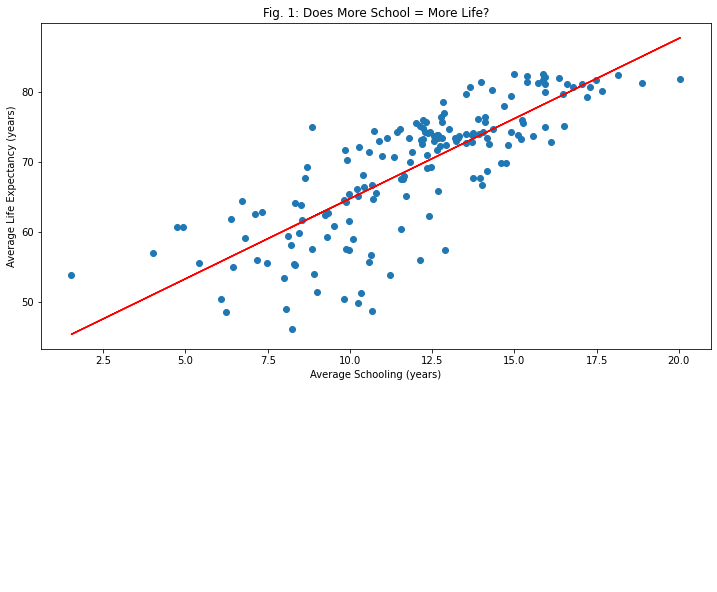

In [27]:
fig = plt.figure(figsize =(12, 6))

school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

correlation_school_life = st.pearsonr(life_exp_mean,school_mean)
print(f"The correlation between average years in school and average life expectancy is {round(correlation_school_life[0],2)}")


x_values = school_mean
y_values = life_exp_mean
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="purple")
plt.xlabel("Average Schooling (years)")
plt.ylabel("Average Life Expectancy (years)")
plt.title("Fig. 1: Does More School = More Life?")

## "Fig. #: Does More Development = More School?"

<AxesSubplot:>

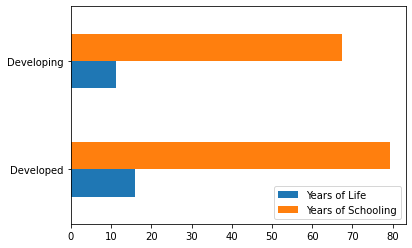

In [28]:
school_mean = school_df.groupby("Country")["Schooling"].mean()
school_mean

life_exp_mean = school_df.groupby("Country")["Life expectancy"].mean()
life_exp_mean

Life = list(school_df.groupby("Status")["Schooling"].mean())
School = list(school_df.groupby("Status")["Life expectancy"].mean())
index = ['Developed', 'Developing']
df = pd.DataFrame({'Years of Life': Life,
                    'Years of Schooling': School}, index=index)

ax = df.plot.barh()
ax

In [61]:
## "Fig. #: Does More Alcohol = More Money flowing?"

In [46]:
alc_df = reduced_df
alc_df = alc_df.loc[alc_df['Country'] != "Sudan"]
# Sorting out to see .01 values and then sorting by mean
# Run this to get a summary table
# alc_df.groupby("Country")['Alcohol'].describe().sort_values('min')


# Drop all the countries with .01 as a minimum value, interpreting that value as bad data (but WHO knows?!)
alc_sum_table = alc_df.groupby("Country")['Alcohol'].describe().sort_values('min')
alc_sum_table.drop(alc_sum_table.loc[alc_sum_table['min'] == .01].index, inplace=True)
alc_sum_table = alc_sum_table.merge(alc_df.groupby("Country")['Status'].agg('min'), left_on='Country', right_index=True)
# len(alc_sum_table) = 95
# alc_sum_table['min'].agg('median') = 5.11


# Setting up the tables to aggregate!
gdp_mean = alc_df.groupby("Country")['GDP'].agg('mean')
gdp_mean = pd.DataFrame(gdp_mean)

# Get the Upper and Lower Countries
alc_sum_table = alc_sum_table.merge(gdp_mean, left_on="Country", right_index=True)
alc_sum_table = alc_sum_table.merge(alc_df.groupby('Country')['Life expectancy'].agg('mean'), on='Country')
alc_sum_table = alc_sum_table.merge(alc_df.groupby('Country')['BMI'].agg('mean'), on='Country')
alc_sum_table = alc_sum_table.merge(alc_df.groupby('Country')['Schooling'].agg('mean'), on='Country')

In [47]:
# Do these last, these are copies of the alc sum table grouped by Status
devd_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developed']
deving_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developing']
alc_sum_table

# run for any null values? Wait to run this
# drop_em = drop_em.dropna(axis='index', how='any')

,count,mean,std,min,25%,50%,75%,max,Status,GDP,Life expectancy,BMI,Schooling
Country,,,,,,,,,,,,,
Indonesia,15.0,0.068667,0.013558,0.05,0.060,0.06,0.080,0.09,Developing,1669.116783,67.55625,19.95625,11.61250
Saudi Arabia,15.0,0.074667,0.019952,0.05,0.050,0.09,0.090,0.10,Developing,10689.052946,73.46875,55.31250,13.28750
Egypt,15.0,0.188667,0.035429,0.14,0.155,0.21,0.215,0.24,Developing,NaN,71.50000,49.26250,11.89375
Senegal,15.0,0.309333,0.032834,0.26,0.280,0.32,0.335,0.36,Developing,274.611166,62.56875,18.44375,7.12500
Djibouti,15.0,0.764000,0.349873,0.38,0.470,0.53,1.025,1.34,Developing,897.999871,60.75625,26.25000,4.75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,15.0,12.404667,0.936695,11.10,11.750,12.20,13.335,13.89,Developing,26465.551381,82.21875,51.98125,15.90000
Austria,15.0,12.236000,0.408705,11.30,12.070,12.26,12.400,13.20,Developed,33827.476309,81.48125,48.28750,15.38750
Croatia,15.0,12.448000,0.666207,11.49,12.080,12.21,12.920,13.78,Developed,9056.784719,76.11875,52.35625,13.88750


In [48]:
# Do these last, these are copies of the alc sum table grouped by Status
devd_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developed']
deving_alc_sum_table = alc_sum_table.loc[alc_sum_table['Status'] == 'Developing']
alc_sum_table

# run for any null values? Wait to run this
# drop_em = drop_em.dropna(axis='index', how='any')

,count,mean,std,min,25%,50%,75%,max,Status,GDP,Life expectancy,BMI,Schooling
Country,,,,,,,,,,,,,
Indonesia,15.0,0.068667,0.013558,0.05,0.060,0.06,0.080,0.09,Developing,1669.116783,67.55625,19.95625,11.61250
Saudi Arabia,15.0,0.074667,0.019952,0.05,0.050,0.09,0.090,0.10,Developing,10689.052946,73.46875,55.31250,13.28750
Egypt,15.0,0.188667,0.035429,0.14,0.155,0.21,0.215,0.24,Developing,NaN,71.50000,49.26250,11.89375
Senegal,15.0,0.309333,0.032834,0.26,0.280,0.32,0.335,0.36,Developing,274.611166,62.56875,18.44375,7.12500
Djibouti,15.0,0.764000,0.349873,0.38,0.470,0.53,1.025,1.34,Developing,897.999871,60.75625,26.25000,4.75000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
France,15.0,12.404667,0.936695,11.10,11.750,12.20,13.335,13.89,Developing,26465.551381,82.21875,51.98125,15.90000
Austria,15.0,12.236000,0.408705,11.30,12.070,12.26,12.400,13.20,Developed,33827.476309,81.48125,48.28750,15.38750
Croatia,15.0,12.448000,0.666207,11.49,12.080,12.21,12.920,13.78,Developed,9056.784719,76.11875,52.35625,13.88750


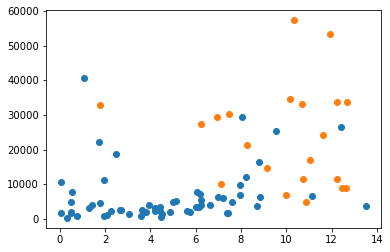

In [49]:
# Alcohol consumption x, GDP y
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,9])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,9])

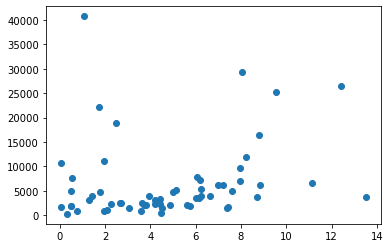

In [50]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,9])

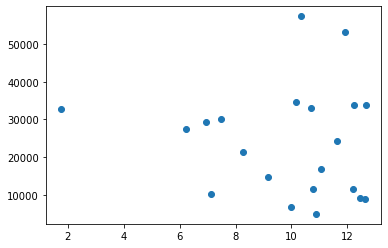

In [51]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,9])

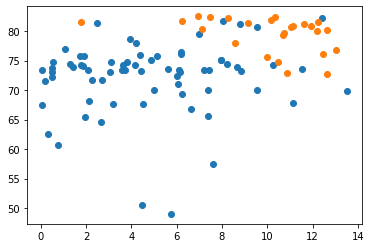

In [52]:
# compared to LE
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,10])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,10])

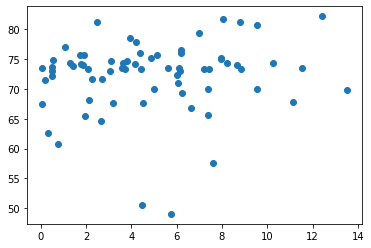

In [53]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,10])

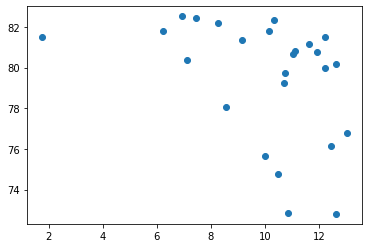

In [54]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,10])

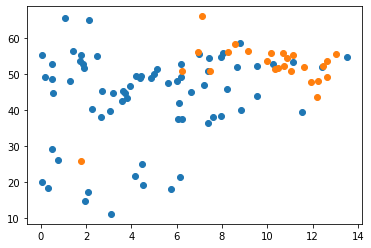

In [55]:
# Compared to BMI
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,11])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,11])

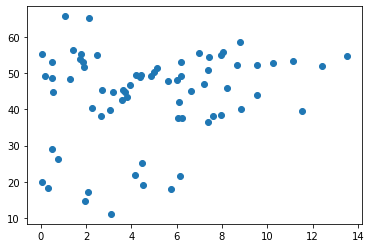

In [56]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,11])

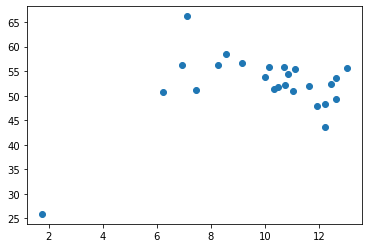

In [57]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,11])

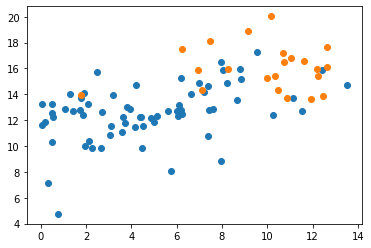

In [58]:
# Compared to BMI
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,12])
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,12])

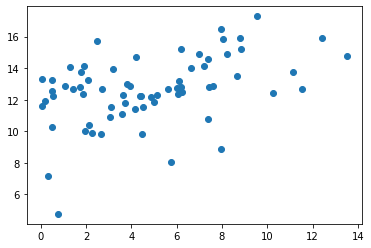

In [59]:
plt.scatter(deving_alc_sum_table.iloc[:,1], deving_alc_sum_table.iloc[:,12])

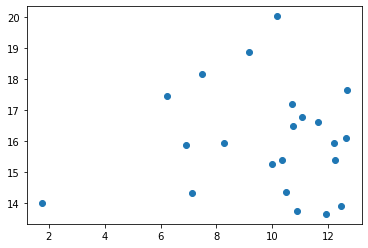

In [60]:
plt.scatter(devd_alc_sum_table.iloc[:,1], devd_alc_sum_table.iloc[:,12])